In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from selenium import webdriver
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib
import streamlit as st
import mlflow
mlflow.set_tracking_uri("file:///C:/Users/hp/Desktop/IPL_PROJECT/mlruns")
mlflow.set_experiment("IPL_Experiments")
import optuna




In [2]:
url="https://www.iplt20.com/stats/2025"
r=requests.get(url)
soup = BeautifulSoup(r.text,"lxml")


In [3]:
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title data-page-title="IPL 2026 Stats &amp; Awards | All Time Records | IPLT20" id="page_title">
   IPL 2026 Stats &amp; Awards | All Time Records | IPLT20
  </title>
  <link href="https://www.iplt20.com/stats/2025" rel="canonical"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=0.5, maximum-scale=3.0" name="viewport"/>
  <!-- <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no"> -->
  <meta content="xj58StRdAhPu8RAQ5X4vVLGBDeRfWYEQjU0ns3cq" name="csrf-token"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <meta content="#19398a" name="theme-color"/>
  <meta content="website" name="og:type"/>
  <meta content="https://www.iplt20.com/stats/2025" name="og:url"/>
  <meta content="IPL 2026 Stats &amp; Awards | All Time Records | IPLT20" propert

In [14]:
driver = webdriver.Chrome()
driver.get("https://www.iplt20.com/stats/2025")

# Scroll multiple times to trigger lazy loading
for i in range(10):  # adjust until all rows are loaded
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # wait for Angular to fetch and render

# Now parse the fully loaded DOM
soup = BeautifulSoup(driver.page_source, "html.parser")
table = soup.find("table", class_="st-table statsTable ng-scope")
headers=table.find_all("th")
head=[]
for i in headers:
    heads=i.text
    head.append(heads)
rows = []
for row in table.find_all("tr")[1:]:
    cols = [td.get_text(strip=True) for td in row.find_all("td")]
    if cols:
        rows.append(cols)

print(len(rows))  
driver.quit()


156


In [15]:
df=pd.DataFrame(rows,columns=head)
df.head(150)

,POS,Player,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
0,1,Sai SudharsanGT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,2,Surya Kumar YadavMI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,3,Virat KohliRCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,4,Shubman GillGT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,5,Mitchell MarshLSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Trent BoultMI,2,16,2,1,1*,2.00,3,66.66,0,0,0,0
146,147,Spencer JohnsonKKR,2,4,2,2,1*,-,4,50.00,0,0,0,0
147,148,Arshdeep SinghPBKS,2,17,2,1,1*,2.00,6,33.33,0,0,0,0
148,149,Varun ChakaravarthyKKR,1,13,1,1,1*,-,1,100.00,0,0,0,0


In [16]:
df2=df.drop(columns=["POS"],axis=1)
df2.head()

,Player,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
0,Sai SudharsanGT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar YadavMI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat KohliRCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman GillGT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell MarshLSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  156 non-null    object
 1   Runs    156 non-null    object
 2   Mat     156 non-null    object
 3   Inns    156 non-null    object
 4   NO      156 non-null    object
 5   HS      156 non-null    object
 6   Avg     156 non-null    object
 7   BF      156 non-null    object
 8   SR      156 non-null    object
 9   100     156 non-null    object
 10  50      156 non-null    object
 11  4s      156 non-null    object
 12  6s      156 non-null    object
dtypes: object(13)
memory usage: 16.0+ KB


In [18]:
# converting HS and AVg to int
df2["HS"] = df2["HS"].str.replace("*", "", regex=False)

df2[["HS", "Avg"]] = df2[["HS", "Avg"]].apply(pd.to_numeric, errors="coerce")
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  156 non-null    object 
 1   Runs    156 non-null    object 
 2   Mat     156 non-null    object 
 3   Inns    156 non-null    object 
 4   NO      156 non-null    object 
 5   HS      156 non-null    int64  
 6   Avg     141 non-null    float64
 7   BF      156 non-null    object 
 8   SR      156 non-null    object 
 9   100     156 non-null    object 
 10  50      156 non-null    object 
 11  4s      156 non-null    object 
 12  6s      156 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 16.0+ KB


In [19]:
df2.to_csv("ipl auction.csv")

In [20]:
df2.shape

(156, 13)

In [21]:
df2.describe()

,HS,Avg
count,156.000000,141.000000
mean,40.737179,23.087234
std,33.637750,15.094148
min,1.000000,1.000000
25%,8.000000,9.400000
50%,37.000000,23.300000
75%,65.000000,32.750000
max,141.000000,65.180000


In [22]:
df2.duplicated().sum()

0

EDA

UNIVARIATE ANALYSIS

In [14]:
numeric_cols=df2.drop(columns="Player")
numeric_cols

,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
0,759,15,15,1,108,54.21,486,156.17,1,6,88,21
1,717,16,16,5,73,65.18,427,167.91,0,5,69,38
2,657,15,15,3,73,54.75,454,144.71,0,8,66,19
3,650,15,15,2,93,50.00,417,155.87,0,6,62,24
4,627,13,13,0,117,48.23,383,163.70,1,6,56,37
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,14,2,2,1,NaN,2,50.00,0,0,0,0
152,1,8,2,1,1,1.00,3,33.33,0,0,0,0
153,1,1,1,0,1,1.00,3,33.33,0,0,0,0
154,1,13,2,1,1,1.00,3,33.33,0,0,0,0


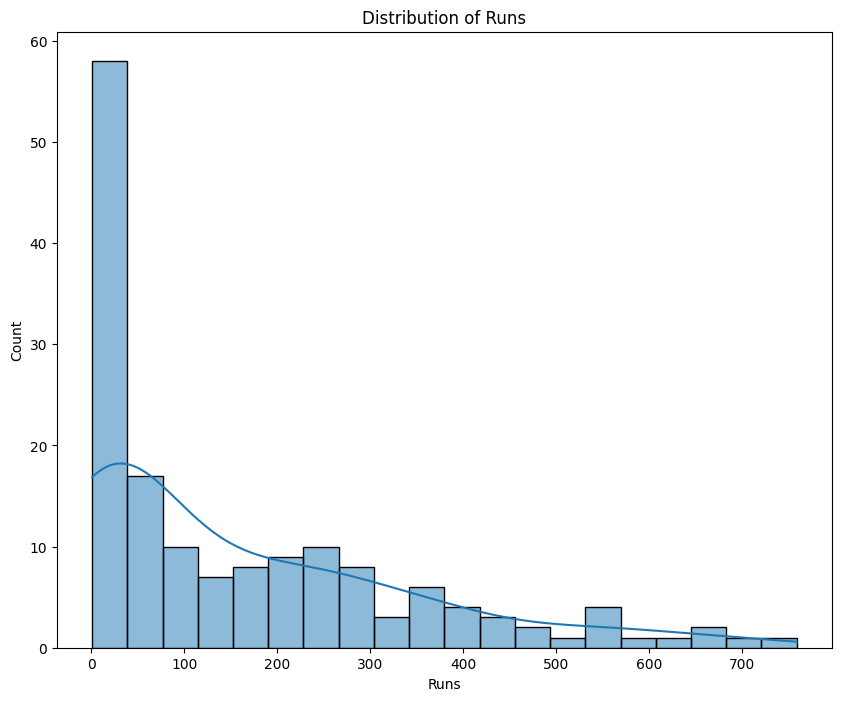

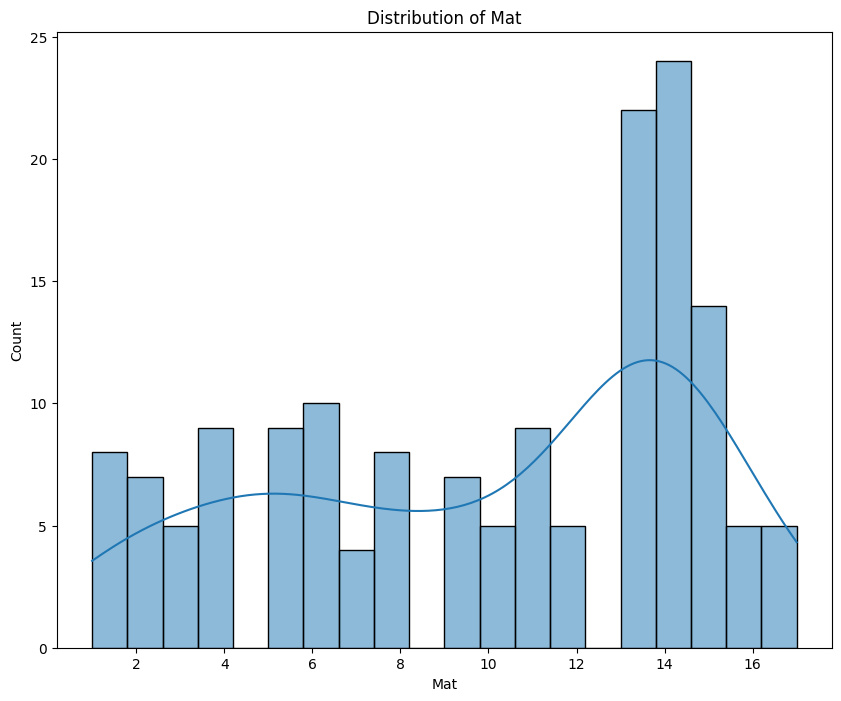

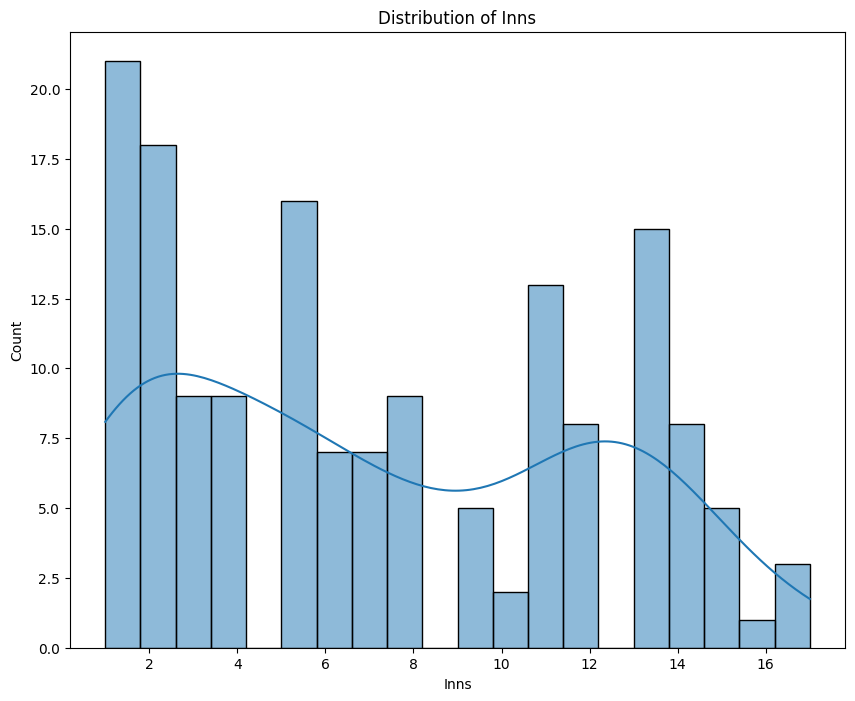

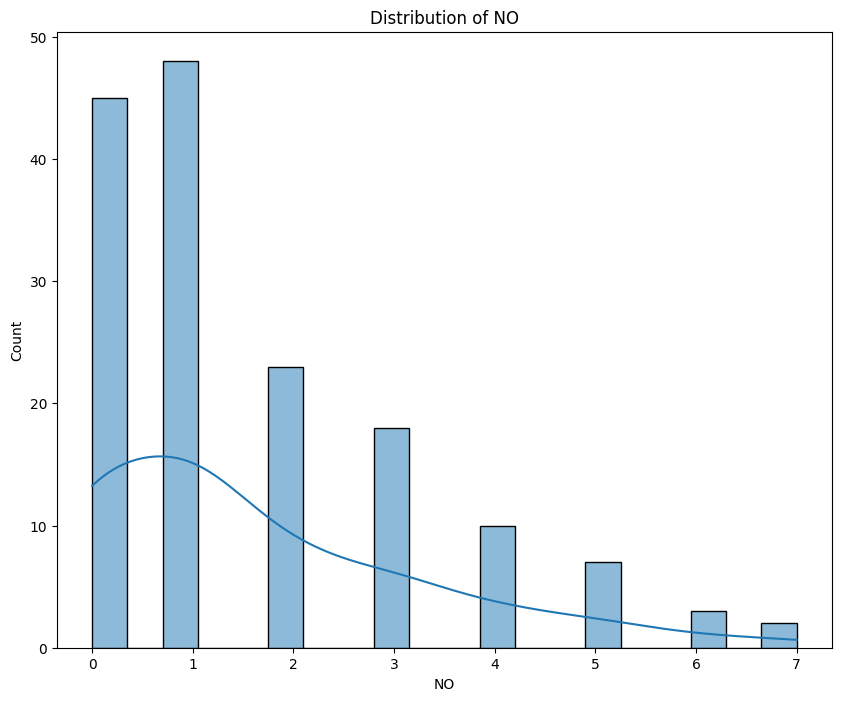

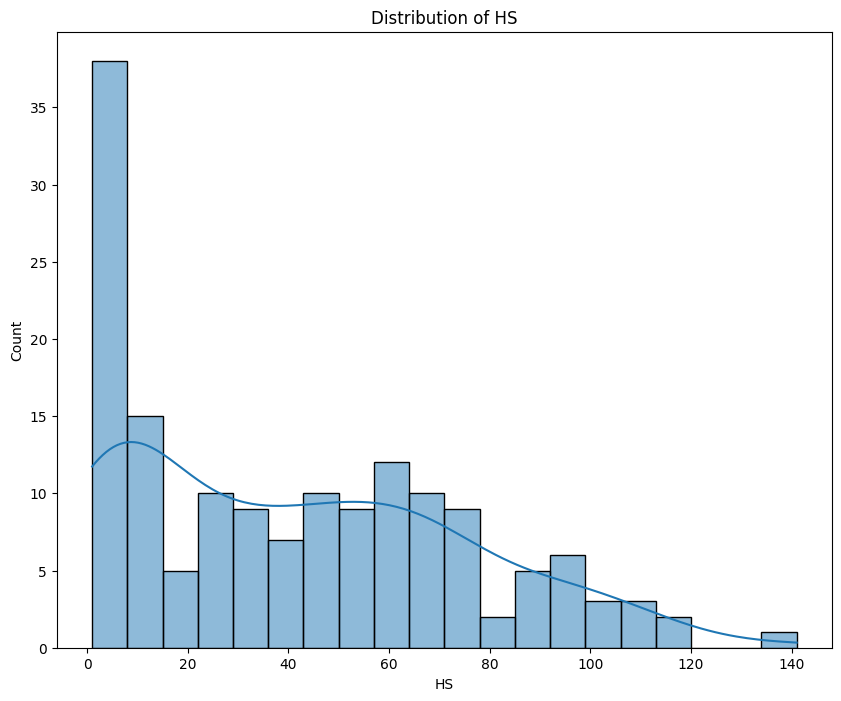

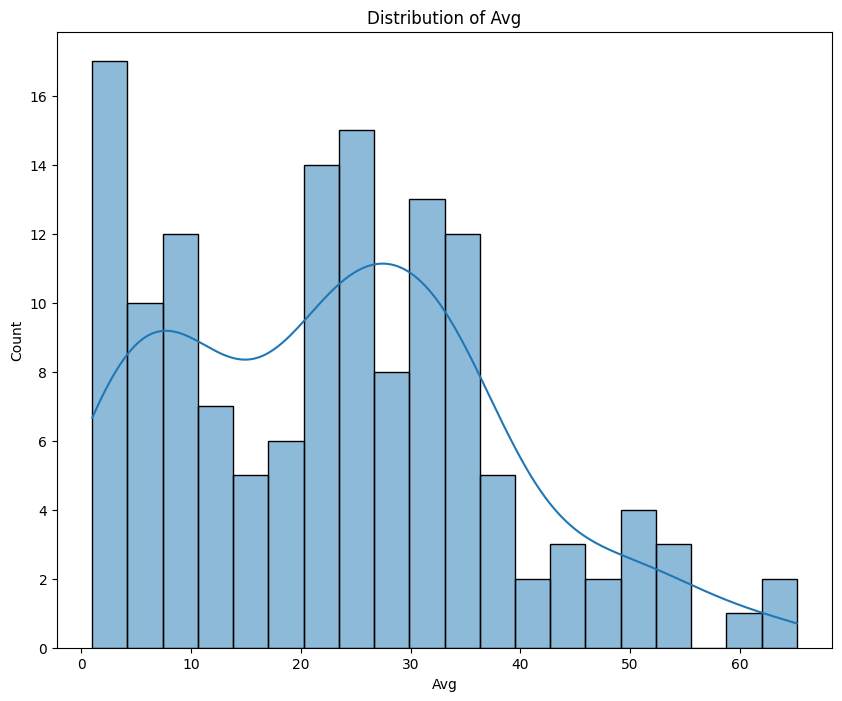

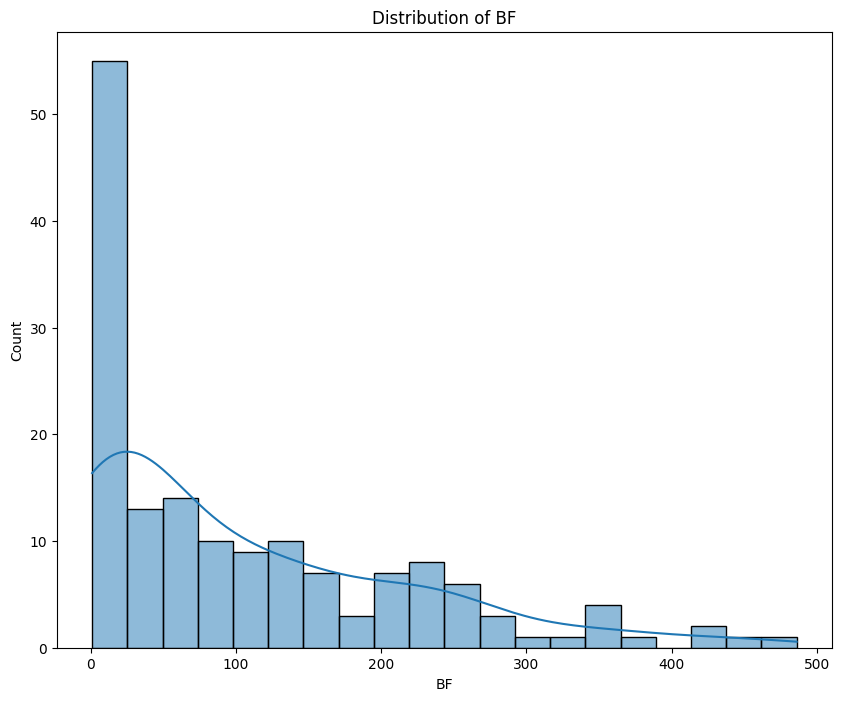

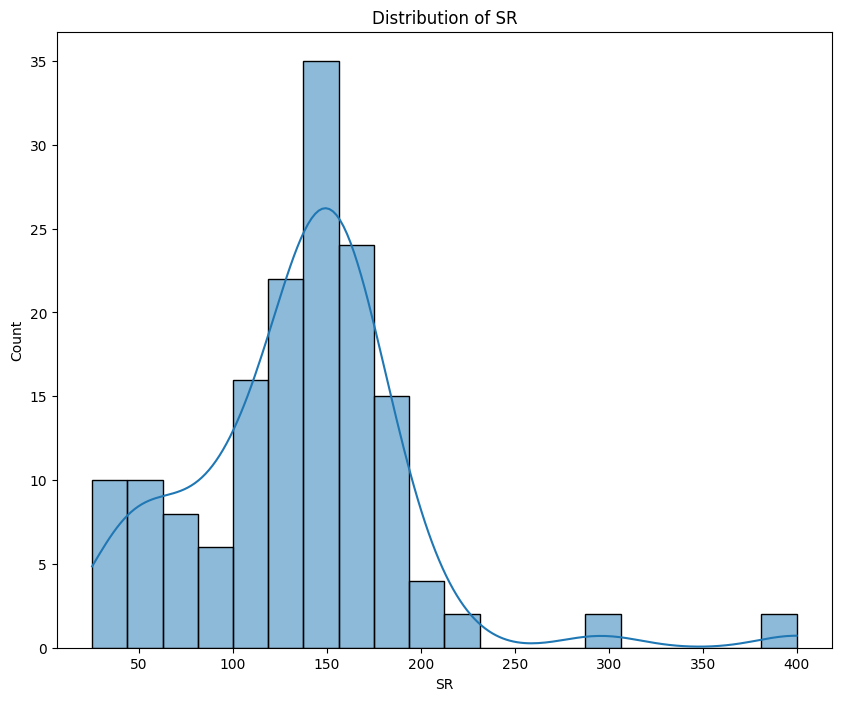

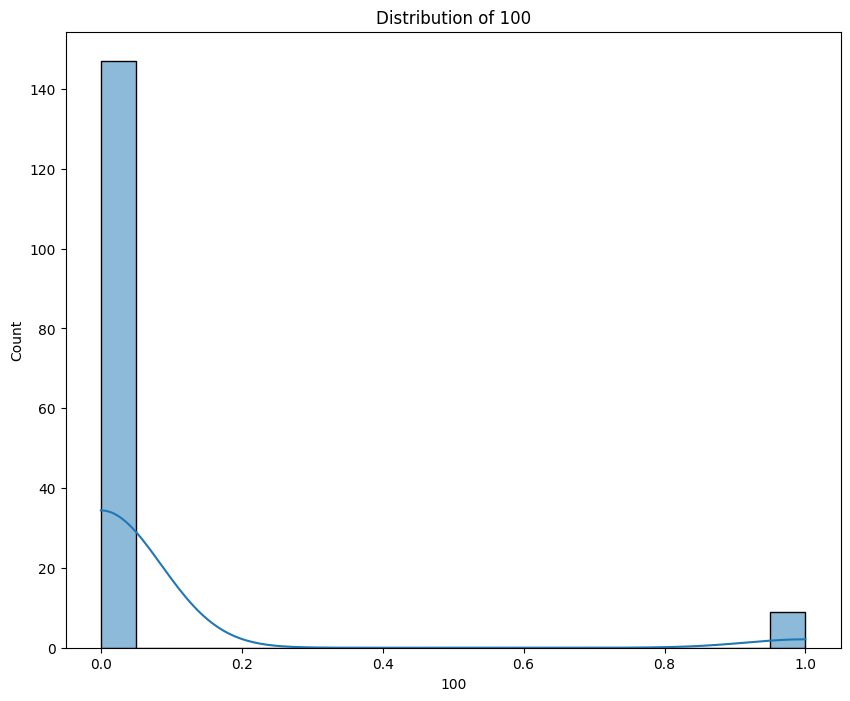

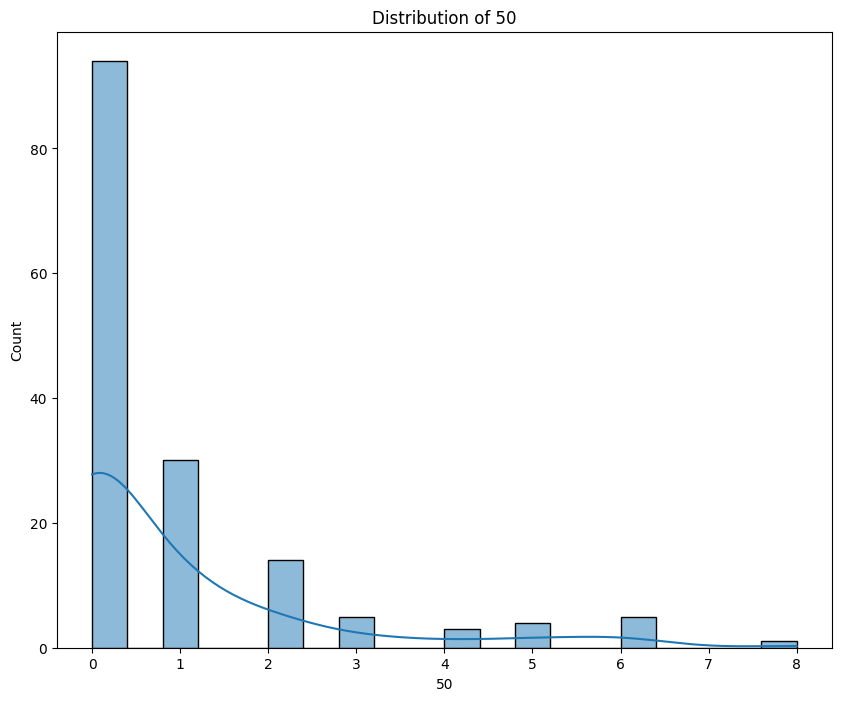

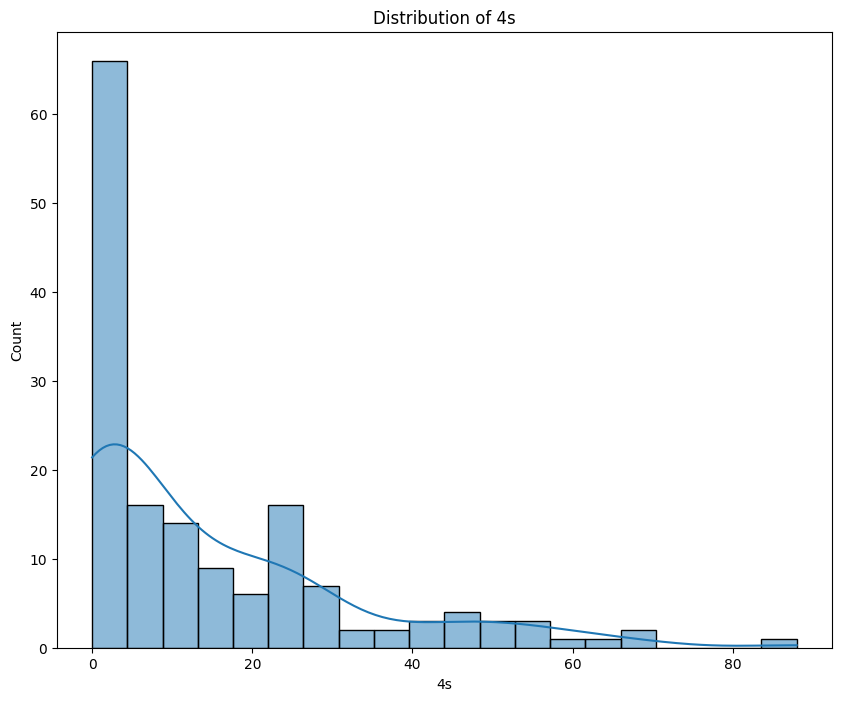

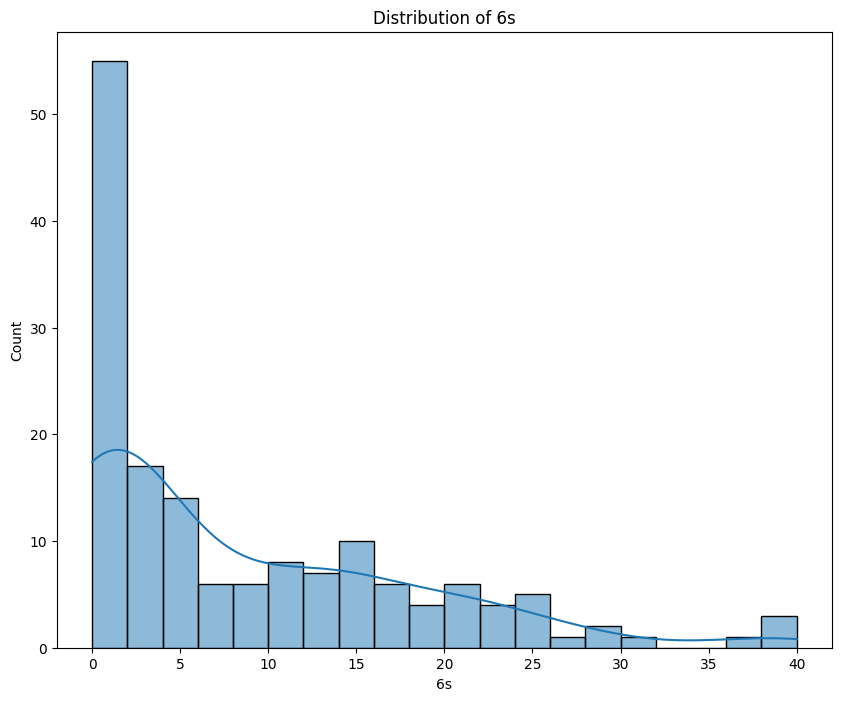

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(10,8))
    sns.histplot(df2[col],bins=20,kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

BIVARIATE

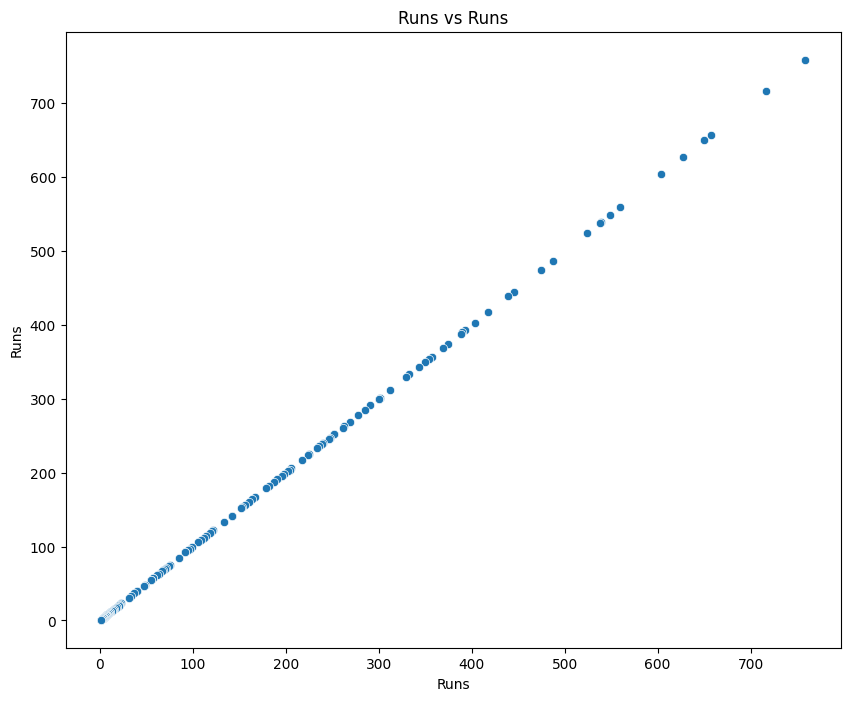

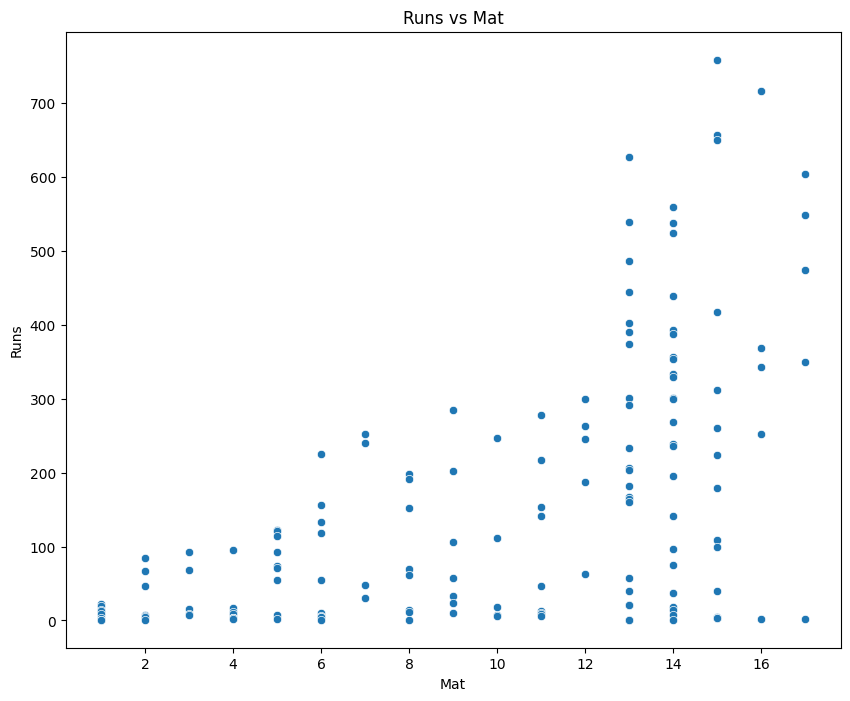

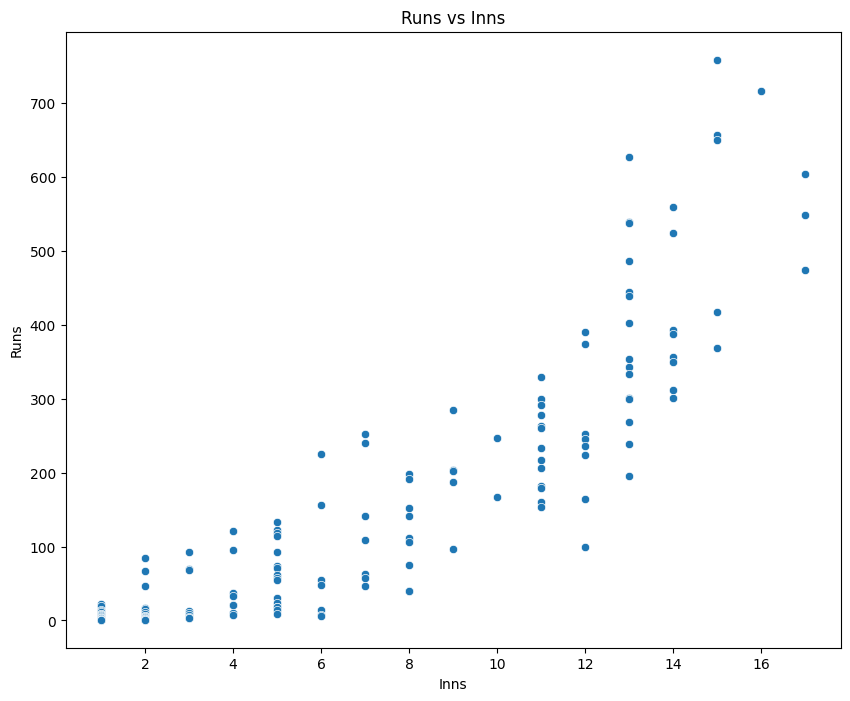

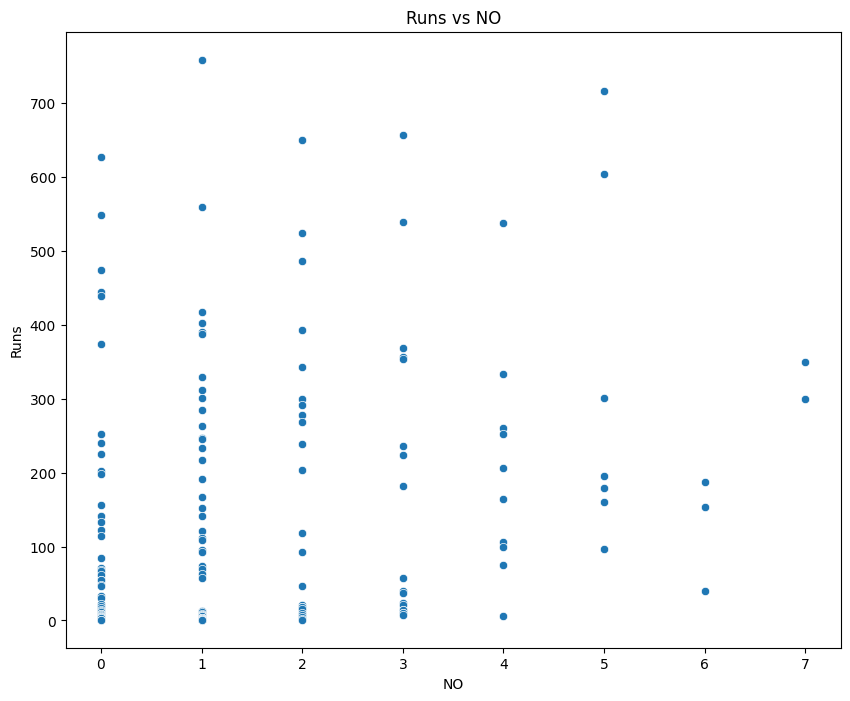

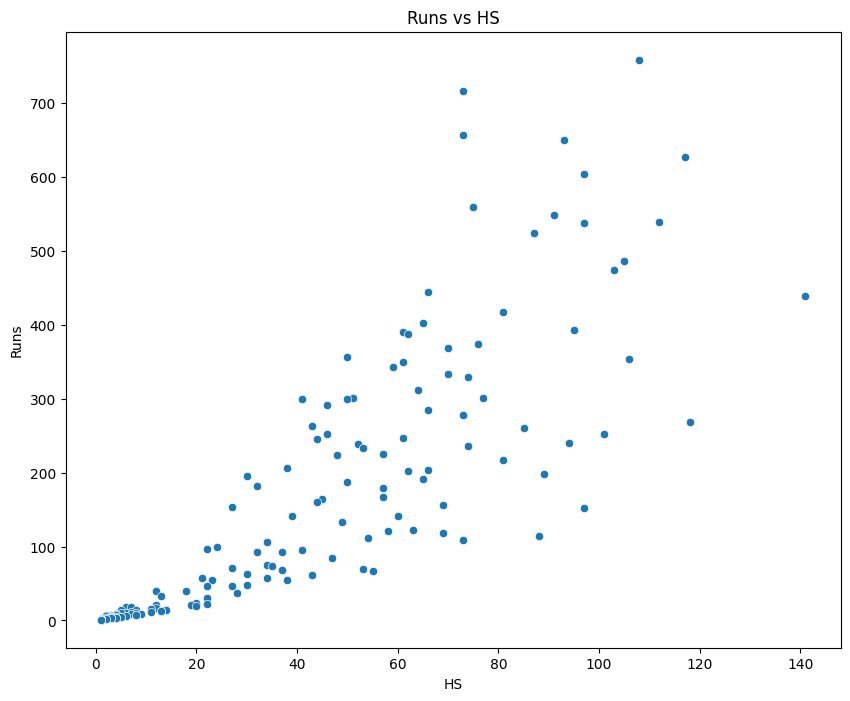

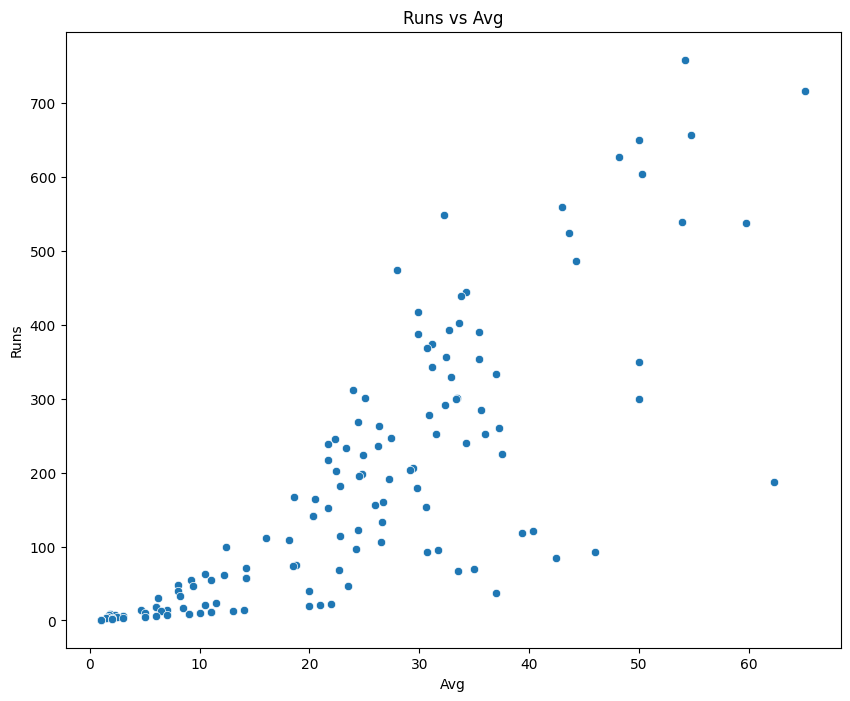

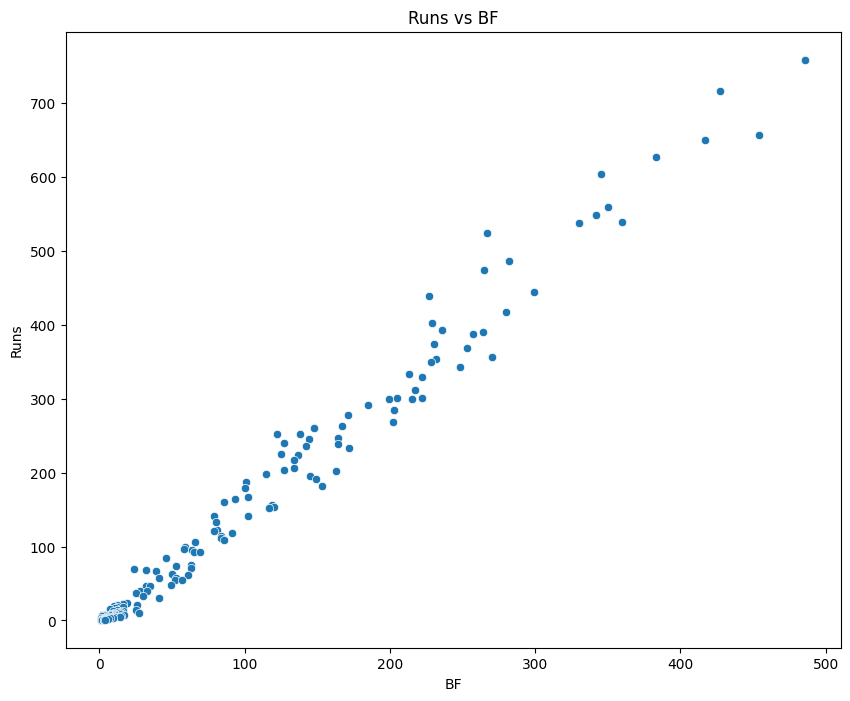

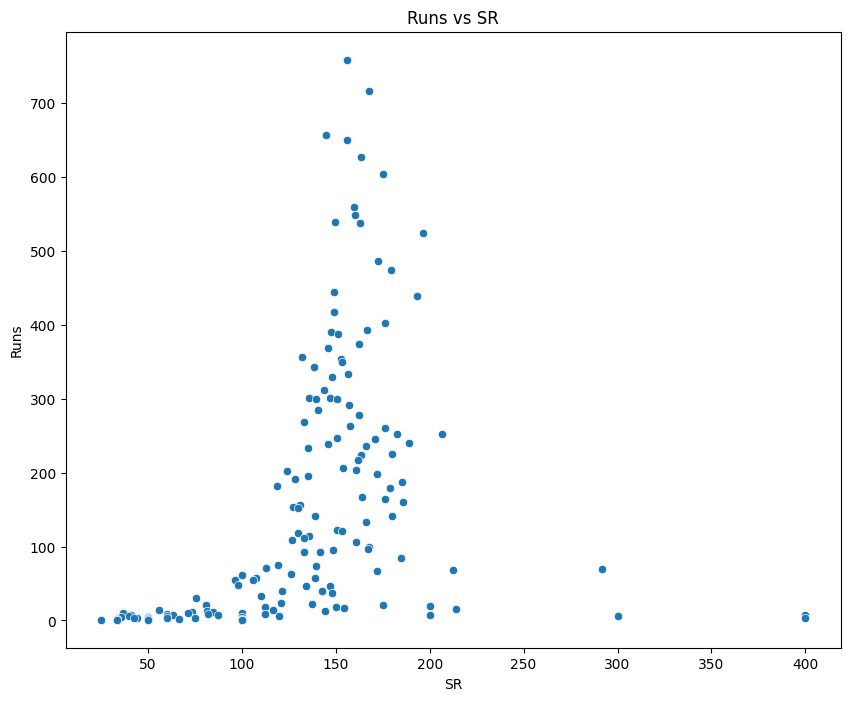

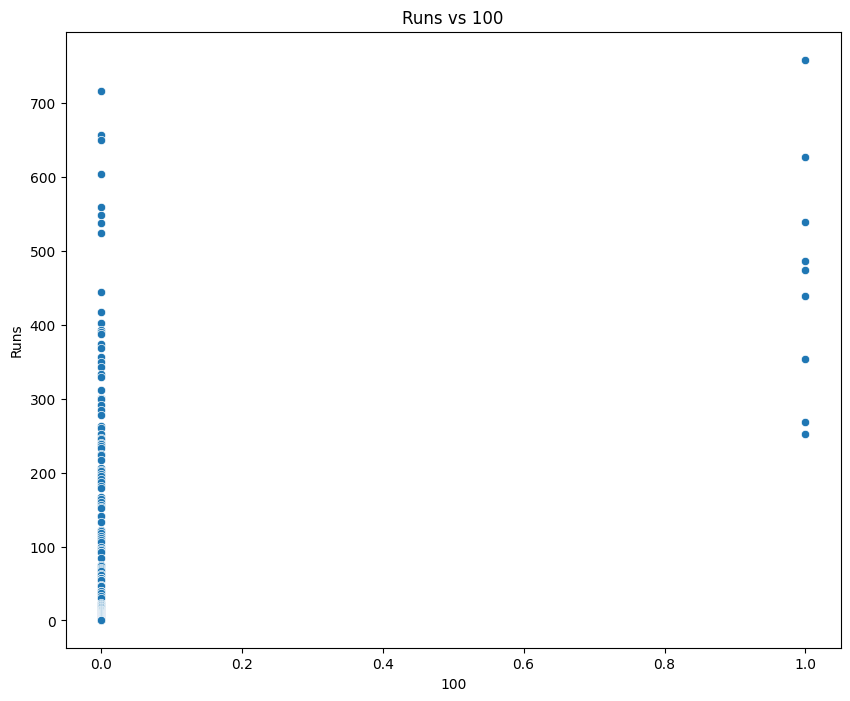

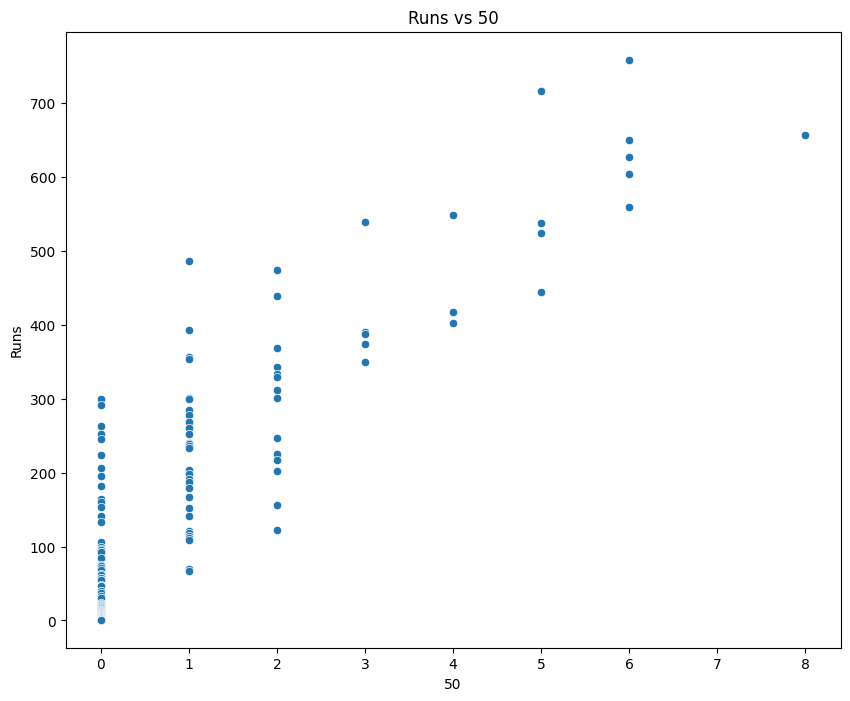

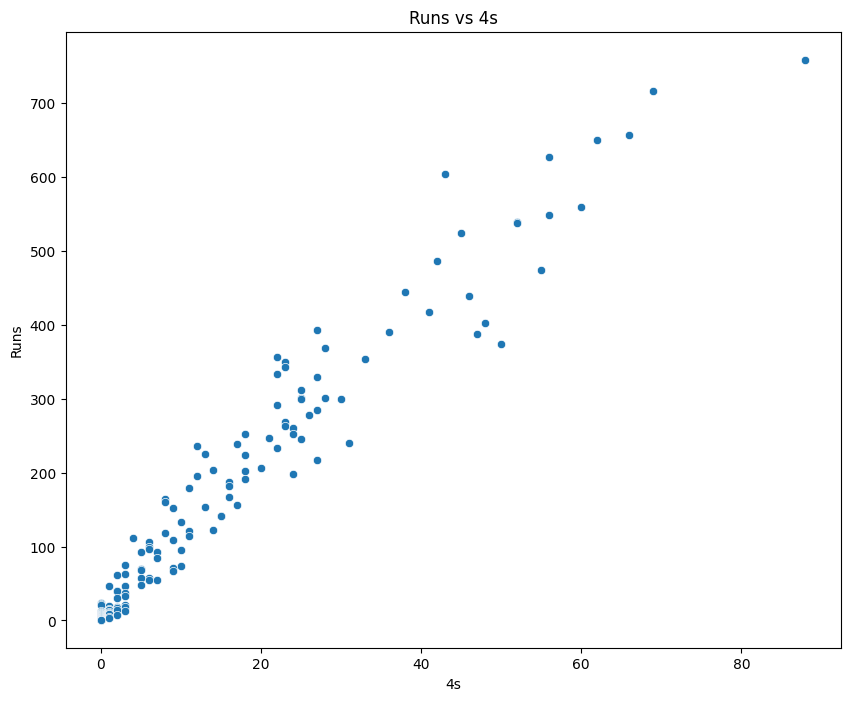

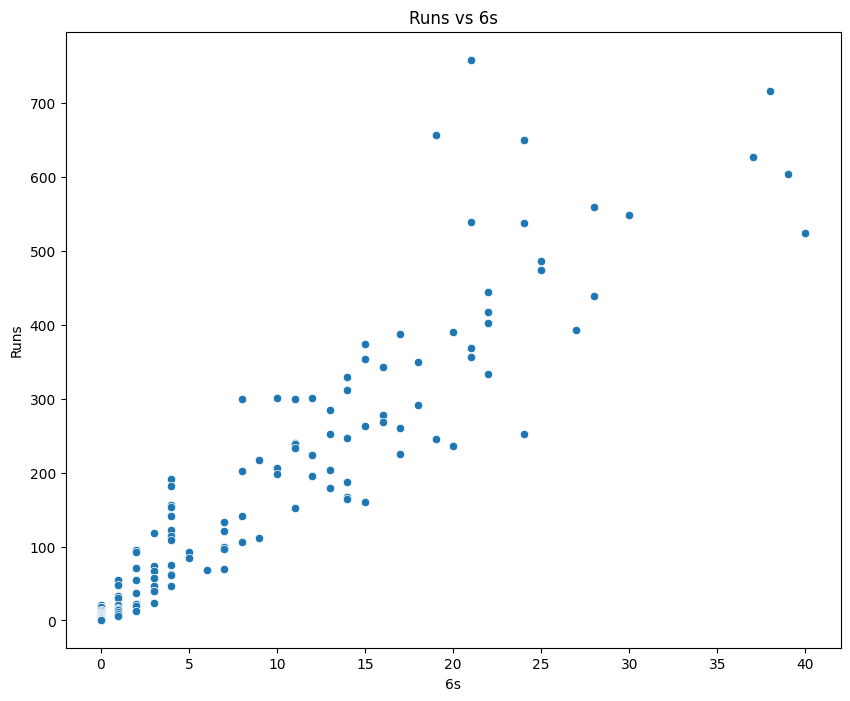

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=col,y="Runs",data=df2)
    plt.title("Runs vs "+col)
    plt.show

In [17]:
df2.head()

,Player,Runs,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
0,Sai SudharsanGT,759,15,15,1,108,54.21,486,156.17,1,6,88,21
1,Surya Kumar YadavMI,717,16,16,5,73,65.18,427,167.91,0,5,69,38
2,Virat KohliRCB,657,15,15,3,73,54.75,454,144.71,0,8,66,19
3,Shubman GillGT,650,15,15,2,93,50.00,417,155.87,0,6,62,24
4,Mitchell MarshLSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


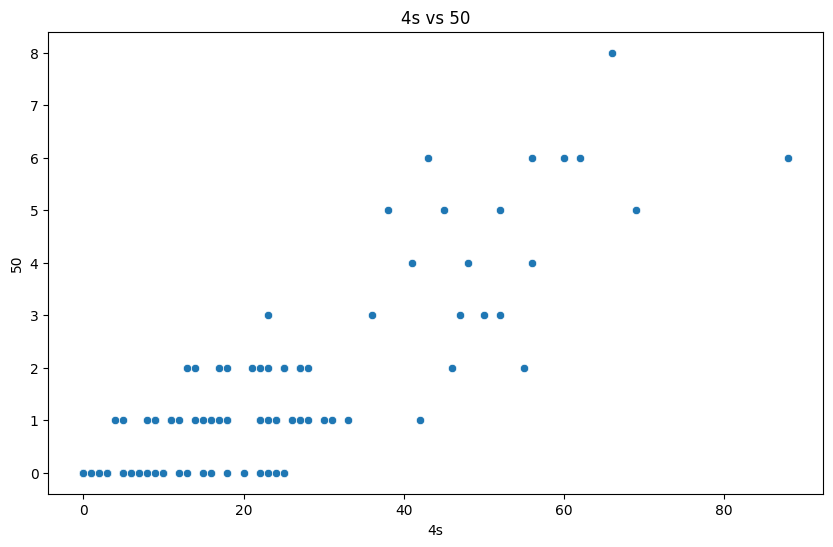

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="4s",y="50",data=df2)
plt.title("4s vs 50")
plt.show()

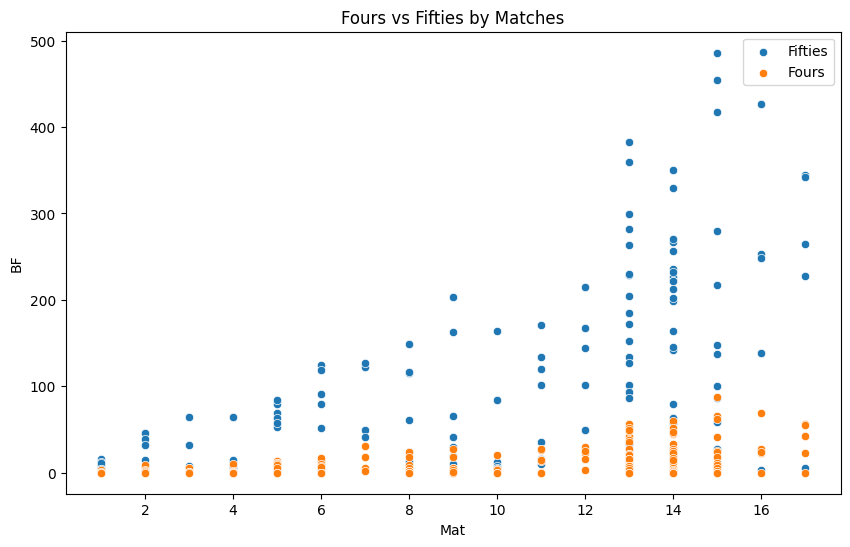

In [19]:

plt.figure(figsize=(10,6))
sns.scatterplot(x="Mat", y="BF", data=df2, label="Fifties")
sns.scatterplot(x="Mat", y="4s", data=df2, label="Fours")

plt.title("Fours vs Fifties by Matches")
plt.legend()
plt.show()


MULTIVARIATE

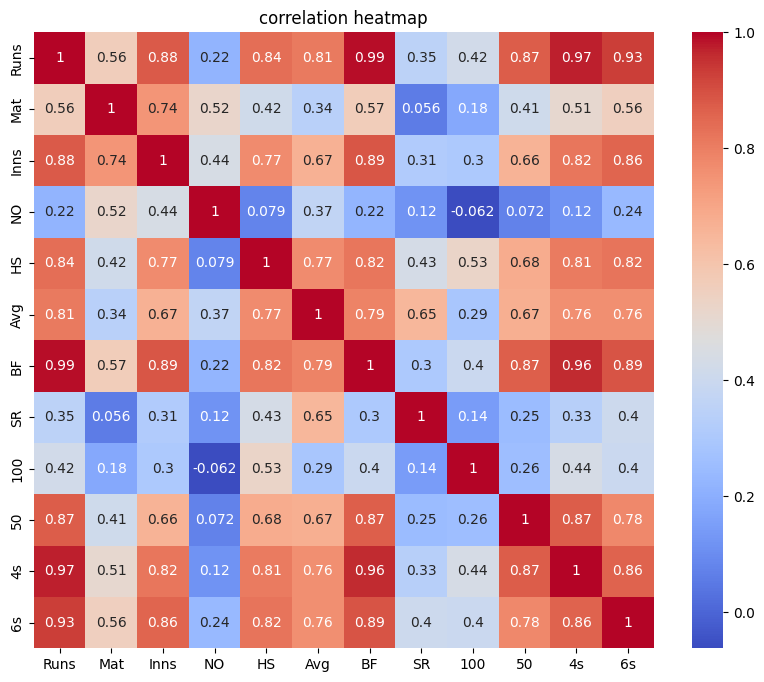

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(),annot=True,cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

Runs vs BF-  Extremely strong correlation (0.99). This makes sense—more balls faced usually means more runs scored.

Run vs Boundaries- Runs have higher correlation with both 4s and 6s. Boundary hitting is a major driver of run accumulation.

Run vs Avg- Strong correlation (0.81). Players who score more runs tend to maintain higher batting averages

Runs vs Strike Rate(SR)- It have a moderate correlation (0.35).  This shows that scoring big runs doesn’t necessarily mean scoring quickly—accumulation and acceleration are somewhat independent.

50 have higher correlations with 4s,6s and BF when 50s increases the number of ball faced and number of 4s and 6s will increase.

centuries- surprisingly Runs have weaker correlation with 100(0.47) than 50 (0.87). This suggests consistency (frequent 50s) is more strongly tied to overall run tally than occasional big scores.

NO- Weak correlations across most metrics. Being not out doesn’t strongly influence overall performance indicators except a mild effect on average (0.37).

Matches- Only moderately correlated with Runs (0.56). Simply playing more matches doesn’t guarantee higher run totals—it depends on innings played and performance quality.

In [21]:
# splittind the dataset into features and target variable 
x=numeric_cols.drop("Runs",axis=1)
y=df2["Runs"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)


In [22]:
x_train_scaled

array([[-1.53484752, -1.02583384, -0.96706187, ...,  0.00532956,
        -0.33521038, -0.56924111],
       [ 0.74555171,  1.22686721,  0.3843451 , ...,  0.00532956,
         1.42244522,  1.63243659],
       [ 0.74555171,  1.0220762 ,  1.73575208, ..., -0.57559288,
        -0.38847267,  0.53159774],
       ...,
       [ 0.95286073,  1.22686721, -0.96706187, ...,  0.58625201,
         1.63549439,  1.93266537],
       [-0.91292046, -0.41146083, -0.96706187, ..., -0.57559288,
        -0.49499725, -0.76939363],
       [-1.74215654, -1.23062484, -0.96706187, ..., -0.57559288,
        -0.814571  , -0.66931737]])

In [31]:
def objective(trial):
    model_name = trial.suggest_categorical("model", 
                                           ["LinearRegression", 
                                            "KNeighborsRegressor", 
                                            "DecisionTreeRegressor", 
                                            "GradientBoostingRegressor"])
    
    if model_name == "LinearRegression":
        estimator = LinearRegression(
            fit_intercept=trial.suggest_categorical("lr_fit_intercept", [True, False]),
            positive=trial.suggest_categorical("lr_positive", [True, False])
        )
        rfecv = RFECV(estimator=estimator, cv=5, scoring="r2", n_jobs=-1)
        pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("feature_selection", rfecv),
            ("estimator", estimator)
        ])

    elif model_name == "KNeighborsRegressor":
        estimator = KNeighborsRegressor(
            n_neighbors=trial.suggest_int("knn_n_neighbors", 3, 11, step=2),
            weights=trial.suggest_categorical("knn_weights", ["uniform", "distance"])
        )
        pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("estimator", estimator)
        ])

    elif model_name == "DecisionTreeRegressor":
        estimator = DecisionTreeRegressor(
            random_state=42,
            max_depth=trial.suggest_categorical("dt_max_depth", [None, 5, 10]),
            min_samples_split=trial.suggest_int("dt_min_samples_split", 2, 5),
            min_samples_leaf=trial.suggest_int("dt_min_samples_leaf", 1, 2)
        )
        rfecv = RFECV(estimator=estimator, cv=5, scoring="r2", n_jobs=-1)
        pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("feature_selection", rfecv),
            ("estimator", estimator)
        ])

    elif model_name == "GradientBoostingRegressor":
        estimator = GradientBoostingRegressor(
            random_state=42,
            n_estimators=trial.suggest_categorical("gb_n_estimators", [100, 200]),
            learning_rate=trial.suggest_float("gb_learning_rate", 0.05, 0.1),
            max_depth=trial.suggest_categorical("gb_max_depth", [3, 5])
        )
        rfecv = RFECV(estimator=estimator, cv=5, scoring="r2", n_jobs=-1)
        pipeline = Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("feature_selection", rfecv),
            ("estimator", estimator)
        ])

    score = cross_val_score(pipeline, x_train_scaled, y_train, cv=5, scoring="r2").mean()
    return score
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_score = study.best_value

with mlflow.start_run(run_name="Optuna_Best_Run"):
    mlflow.log_param("best_model", best_params["model"])
    
    # Log each parameter with a clear prefix
    for k, v in best_params.items():
        mlflow.log_param(f"optuna_{k}", v)
    
    mlflow.log_metric("best_cv_r2", best_score)
print("Best Model:", best_params["model"])
print("Best CV R2 Score:", best_score)
    

[I 2026-02-24 10:50:08,823] A new study created in memory with name: no-name-ac494827-a9f1-40b6-8e91-347b39cca921


[I 2026-02-24 10:50:08,894] Trial 0 finished with value: 0.9141668604069343 and parameters: {'model': 'KNeighborsRegressor', 'knn_n_neighbors': 3, 'knn_weights': 'uniform'}. Best is trial 0 with value: 0.9141668604069343.
[I 2026-02-24 10:50:08,934] Trial 1 finished with value: 0.9417788707311796 and parameters: {'model': 'KNeighborsRegressor', 'knn_n_neighbors': 7, 'knn_weights': 'distance'}. Best is trial 1 with value: 0.9417788707311796.
[I 2026-02-24 10:50:14,778] Trial 2 finished with value: 0.9976943610700244 and parameters: {'model': 'LinearRegression', 'lr_fit_intercept': True, 'lr_positive': False}. Best is trial 2 with value: 0.9976943610700244.
[I 2026-02-24 10:50:15,063] Trial 3 finished with value: 0.9976142268109655 and parameters: {'model': 'LinearRegression', 'lr_fit_intercept': True, 'lr_positive': True}. Best is trial 2 with value: 0.9976943610700244.
[I 2026-02-24 10:50:38,723] Trial 4 finished with value: 0.9671245680244074 and parameters: {'model': 'GradientBoostin

Best Model: LinearRegression
Best CV R2 Score: 0.9976943610700244


In [ ]:

# Refit the best model on full training data
if best_params["model"] == "LinearRegression":
    best_model = LinearRegression(
        fit_intercept=best_params["lr_fit_intercept"],
        positive=best_params["lr_positive"]
    )
elif best_params["model"] == "KNeighborsRegressor":
    best_model = KNeighborsRegressor(
        n_neighbors=best_params["knn_n_neighbors"],
        weights=best_params["knn_weights"]
    )
elif best_params["model"] == "DecisionTreeRegressor":
    best_model = DecisionTreeRegressor(
        random_state=42,
        max_depth=best_params["dt_max_depth"],
        min_samples_split=best_params["dt_min_samples_split"],
        min_samples_leaf=best_params["dt_min_samples_leaf"]
    )
elif best_params["model"] == "GradientBoostingRegressor":
    best_model = GradientBoostingRegressor(
        random_state=42,
        n_estimators=best_params["gb_n_estimators"],
        learning_rate=best_params["gb_learning_rate"],
        max_depth=best_params["gb_max_depth"]
    )


pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("estimator", best_model)
])

# Fit on full training data
pipeline.fit(x_train_scaled, y_train)

# Log the trained pipeline into MLflow
with mlflow.start_run(run_name="Optuna_Best_Model_Save"):
    mlflow.log_param("best_model", best_params["model"])
    for k, v in best_params.items():
        mlflow.log_param(f"optuna_{k}", v)
    mlflow.log_metric("best_cv_r2", best_score)
    mlflow.sklearn.log_model(pipeline, "optuna_best_model")


In [35]:
x_train.head()

,Mat,Inns,NO,HS,Avg,BF,SR,100,50,4s,6s
86,2,2,0,55,33.50,39,171.79,0,1,9,3
11,13,13,2,105,44.27,282,172.69,1,1,42,25
60,13,12,4,45,20.50,93,176.34,0,0,8,14
67,6,5,0,49,26.60,80,166.25,0,0,10,7
124,2,1,1,8,NaN,2,400.00,0,0,2,0


In [36]:
features = df2[["Inns", "NO", "Avg", "BF", "4s", "6s"]]
imputer=SimpleImputer(strategy="mean")
x=imputer.fit_transform(features)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train_scal=scaler.fit_transform(x_train)
x_test_scal=scaler.fit_transform(x_test)


In [37]:
model=LinearRegression()
model.fit(x_train_scal,y_train)
y_pred=model.predict(x_test_scal)

In [38]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.897227844124386
MSE: 2339.0853350653574


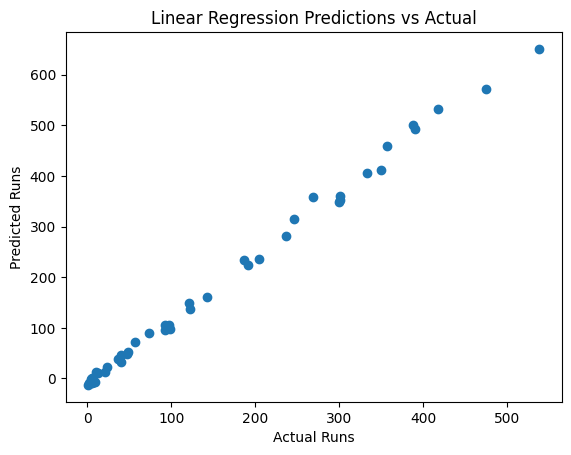

In [39]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Linear Regression Predictions vs Actual")
plt.show()


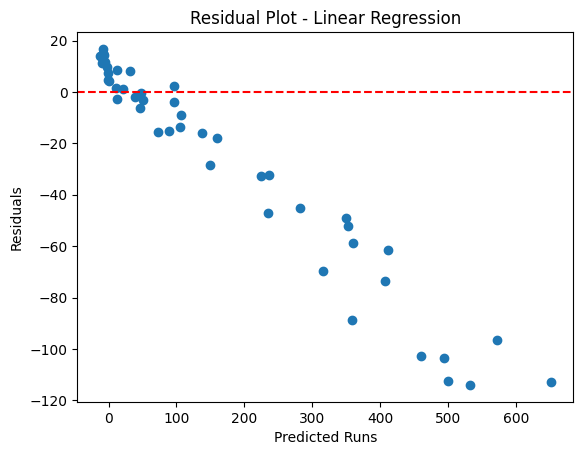

In [56]:

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Runs")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()


In [40]:


# Select features and target
x = df2[["Inns", "NO", "Avg", "BF", "4s", "6s"]]
y = df2["Runs"]

imputer = SimpleImputer(strategy="mean")
x_imputed = imputer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred_poly = model.predict(x_test_poly)

print("Poly R²:", r2_score(y_test, y_pred_poly))
print("Poly MSE:", mean_squared_error(y_test, y_pred_poly))


Poly R²: 0.9998316992485593
Poly MSE: 3.8305104745679315


In [41]:
# training set
y_pred_train=model.predict(x_train_poly)
r2=r2_score(y_train,y_pred_train)
mse_train=mean_squared_error(y_train,y_pred_train)

#testing set
y_pred_test= model.predict(x_test_poly)
r2_test= r2_score(y_test,y_pred_test)
mse_test=mean_squared_error(y_test,y_pred_test)

print("score of training set:",r2)
print("mse_train:",mse_train)
print("score of test:",r2_test)
print("mse_test:",mse_test)

score of training set: 0.9999399601045433
mse_train: 2.1754908376578435
score of test: 0.9998316992485593
mse_test: 3.8305104745679315


In [42]:
import mlflow
import mlflow.sklearn

with mlflow.start_run():
    model.fit(x_train_poly, y_train)
    y_pred_poly = model.predict(x_test_poly)

    r2 = r2_score(y_test, y_pred_poly)
    mse = mean_squared_error(y_test, y_pred_poly)

    mlflow.log_param("degree", 2)
    mlflow.log_param("features", ["Inns", "NO", "Avg", "BF", "4s", "6s"])
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("mse", mse)

    mlflow.sklearn.log_model(model, "ipl_model")


In [43]:
# Define pipeline
poly_lr_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

x = df2[["Inns", "NO", "Avg", "BF", "4s", "6s"]]
y = df2["Runs"]

poly_lr_pipeline.fit(x, y)

# Save pipeline
joblib.dump(poly_lr_pipeline, "poly_linear_regression_pipeline.pkl")


['poly_linear_regression_pipeline.pkl']